In [9]:
import json
import os

def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def save_json(data, file_path):
    with open(file_path, 'w') as file:
        json.dump(data, file, indent=4)

def process_folder(folder_path):
    # Load necessary files
    step_config = load_json(os.path.join(folder_path, 'step_config.json'))
    uuid_response_list = load_json(os.path.join(folder_path, 'uuid_response_list.json'))
    
    # Extract embeddings
    embeddings_path = os.path.join(folder_path, 'embeddings')
    embedding_files = [f for f in os.listdir(embeddings_path) if f.endswith('.json') and os.path.isfile(os.path.join(embeddings_path, f))]
    embeddings = {}
    for embedding_file in embedding_files:
        uuid = embedding_file.split('.')[0]
        embedding_data = load_json(os.path.join(embeddings_path, embedding_file))
        for embedding in embedding_data['embeddings']:
            model_name = embedding['model_name']
            embedding_vector = embedding['embedding']
            if model_name == "text-embedding-3-large":
                embeddings[uuid] = embedding_vector
    
    # Create the final format
    final_data = []
    for response in uuid_response_list:
        uuid = response['uuid']
        response_content = response['response_content']
        configuration = response['configuration']
        embedding_model = "text-embedding-3-large"
        embedding = embeddings.get(uuid, [])
        
        final_data.append({
            "uuid": uuid,
            "response_content": response_content,
            "configuration": configuration,
            "embedding": embedding,
            "embedding_model": embedding_model
        })
    
    return final_data

def main(root_folder):
    folders = [os.path.join(root_folder, folder) for folder in os.listdir(root_folder) if os.path.isdir(os.path.join(root_folder, folder))]
    for folder in folders:
        final_data = process_folder(folder)
        output_file = os.path.join(folder, 'final_output.json')
        save_json(final_data, output_file)
        print(f"Processed {folder} and saved to {output_file}")

if __name__ == "__main__":
    root_folder = "/workspace/slice-monorepo/thebeast/data/test3"
    main(root_folder)


Processed /workspace/slice-monorepo/thebeast/data/test3/step_1 and saved to /workspace/slice-monorepo/thebeast/data/test3/step_1/final_output.json


In [3]:
import os
import json

def truncate_text(text, word_limit=25):
    words = text.split()[:word_limit]
    return ' '.join(words) + '...' if len(words) == word_limit else ' '.join(words)

# Function to print the structure of JSON files
def print_json_structure(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                json_data = json.load(f)
                if json_data:
                    print(f"Structure of file {filename}:")
                    first_item = json_data[0]
                    filtered_item = {k: v for k, v in first_item.items() if k != 'embedding'}
                    if 'response_content' in filtered_item:
                        filtered_item['response_content'] = truncate_text(filtered_item['response_content'])
                    print(json.dumps(filtered_item, indent=4))
                    print("\n" + "="*80 + "\n")

folder_path = '/workspace/clustering/data'

# Print JSON structure
print_json_structure(folder_path)


Structure of file generated_data_3.5_1000.json:
{
    "uuid": "467ad37e-41fd-41e5-9346-3162adbdc3b8",
    "response_content": "As a time traveler visiting Earth in the year 3000, one of the most surprising changes I notice is the advancement of technology in the...",
    "configuration": {
        "max_tokens": 230,
        "temperature": 0.52,
        "top_p": 0.25,
        "model": "gpt-3.5-turbo"
    },
    "embedding_model": "text-embedding-3-large"
}


Structure of file generated_data_4o.json:
{
    "uuid": "e02aa6e1-db68-45cb-90f0-09219455ee0b",
    "response_content": "Upon arriving in the year 3000, the most surprising change I notice is in the realm of technology, specifically the advent of neural interface networks....",
    "configuration": {
        "max_tokens": 440,
        "temperature": 1.68,
        "top_p": 0.55,
        "model": "gpt-4o"
    },
    "embedding_model": "text-embedding-3-large"
}


Structure of file llama3_1000_full.json:
{
    "uuid": "069f10d5-14ec-44

Total texts analyzed: 5000
Average length: 1958.91
Maximum length: 3106
Minimum length: 235


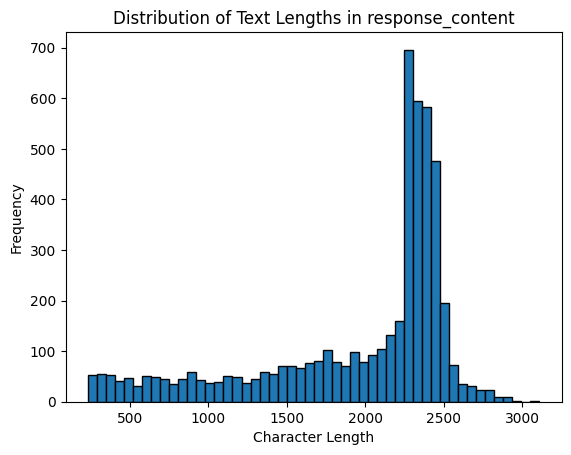

Sample configurations:
{'max_tokens': 230, 'temperature': 0.52, 'top_p': 0.25, 'model': 'gpt-3.5-turbo'}
{'max_tokens': 190, 'temperature': 0.69, 'top_p': 0.81, 'model': 'gpt-3.5-turbo'}
{'max_tokens': 390, 'temperature': 0.74, 'top_p': 0.6, 'model': 'gpt-3.5-turbo'}
{'max_tokens': 300, 'temperature': 0.86, 'top_p': 0.29, 'model': 'gpt-3.5-turbo'}
{'max_tokens': 80, 'temperature': 1.53, 'top_p': 0.84, 'model': 'gpt-3.5-turbo'}


In [6]:
import os
import json
import matplotlib.pyplot as plt

# Function to analyze the length of response_content
def analyze_text_lengths(folder_path):
    lengths = []
    configurations = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                json_data = json.load(f)
                for item in json_data:
                    if 'response_content' in item and 'configuration' in item:
                        text = item['response_content']
                        text_length = len(text)
                        lengths.append(text_length)
                        configurations.append(item['configuration'])

    return lengths, configurations

# Analyze lengths and configurations
folder_path = '/workspace/clustering/data'
lengths, configurations = analyze_text_lengths(folder_path)

# Print statistics
print(f"Total texts analyzed: {len(lengths)}")
print(f"Average length: {sum(lengths) / len(lengths):.2f}")
print(f"Maximum length: {max(lengths)}")
print(f"Minimum length: {min(lengths)}")

# Plot histogram of lengths
plt.hist(lengths, bins=50, edgecolor='black')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in response_content')
plt.show()

# Display a sample of configurations for verification
print("Sample configurations:")
for i in range(5):
    print(configurations[i])


Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


Total texts analyzed: 5000
Average token length: 388.73
Maximum token length: 1153
Minimum token length: 48


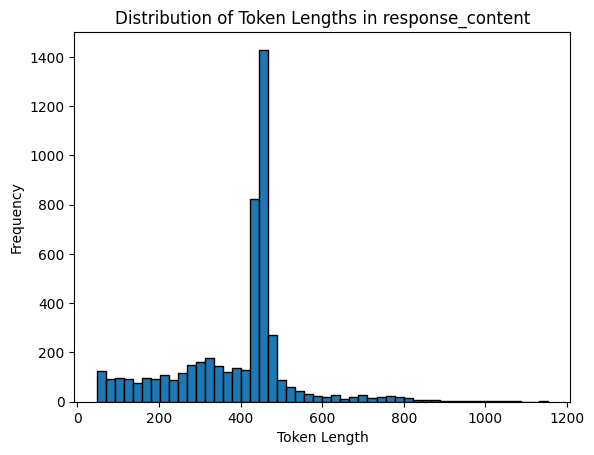

In [7]:
import os
import json
from transformers import BertTokenizer
import matplotlib.pyplot as plt

# Function to analyze the token lengths of response_content
def analyze_token_lengths(folder_path):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    token_lengths = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".json"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                json_data = json.load(f)
                for item in json_data:
                    if 'response_content' in item:
                        text = item['response_content']
                        inputs = tokenizer(text, return_tensors="pt")
                        token_lengths.append(inputs['input_ids'].shape[1])

    return token_lengths

# Analyze token lengths
folder_path = '/workspace/clustering/data'
token_lengths = analyze_token_lengths(folder_path)

# Print statistics
print(f"Total texts analyzed: {len(token_lengths)}")
print(f"Average token length: {sum(token_lengths) / len(token_lengths):.2f}")
print(f"Maximum token length: {max(token_lengths)}")
print(f"Minimum token length: {min(token_lengths)}")

# Plot histogram of token lengths
plt.hist(token_lengths, bins=50, edgecolor='black')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Lengths in response_content')
plt.show()
